In [1469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1470]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1471]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1472]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387366 entries, 0 to 1387365
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1387366 non-null  int64  
 1   kWh       1387366 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.2 MB


In [1473]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1387361    0.15
1387362    0.15
1387363    0.15
1387364    0.15
1387365    0.15
Name: kWh, Length: 1387366, dtype: float64

In [1474]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1387361    0.15
1387362    0.15
1387363    0.15
1387364    0.15
1387365    0.15
Name: kWh, Length: 1387366, dtype: float64

In [1475]:
l=len(conso_data)-1
l

1387365

In [1476]:
conso_data['sec']=conso_data['Interval']/1000


In [1477]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1478]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1479]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387366 entries, 0 to 1387365
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1387366 non-null  int64  
 1   kWh        1387366 non-null  float64
 2   sec        1387366 non-null  float64
 3   Wh         1387366 non-null  float64
 4   cumul(ms)  1387366 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 52.9 MB


In [1480]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1387361,24491,0.15,24.491,146.992773,32635230611
1387362,24009,0.15,24.009,149.943771,32635254620
1387363,24303,0.15,24.303,148.129861,32635278923
1387364,24471,0.15,24.471,147.112909,32635303394
1387365,23846,0.15,23.846,150.968716,32635327240


In [1481]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

32635327240000

In [1482]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 21, 0, 440491)

In [1483]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1484]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [1485]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [1486]:
conso_data['dates']

0         2023-08-21 19:21:22.374491
1         2023-08-21 19:21:44.232491
2         2023-08-21 19:22:06.233491
3         2023-08-21 19:22:28.161491
4         2023-08-21 19:22:50.052491
                     ...            
1387361   2024-09-02 12:41:31.051491
1387362   2024-09-02 12:41:55.060491
1387363   2024-09-02 12:42:19.363491
1387364   2024-09-02 12:42:43.834491
1387365   2024-09-02 12:43:07.680491
Name: dates, Length: 1387366, dtype: datetime64[ns]

In [1487]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:22.374491,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:44.232491,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:22:06.233491,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:28.161491,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:50.052491,21/08/23
...,...,...,...,...,...,...,...
1387361,24491,0.15,24.491,146.992773,32635230611,2024-09-02 12:41:31.051491,02/09/24
1387362,24009,0.15,24.009,149.943771,32635254620,2024-09-02 12:41:55.060491,02/09/24
1387363,24303,0.15,24.303,148.129861,32635278923,2024-09-02 12:42:19.363491,02/09/24
1387364,24471,0.15,24.471,147.112909,32635303394,2024-09-02 12:42:43.834491,02/09/24


In [1488]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('02/09/24', 2, 9, 2024)

In [1489]:
here = now.strftime('%H:%M:%S')
here

'12:44:20'

In [1490]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1491]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 1385460 to 1387365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1906 non-null   int64         
 1   kWh        1906 non-null   float64       
 2   sec        1906 non-null   float64       
 3   Wh         1906 non-null   float64       
 4   cumul(ms)  1906 non-null   int64         
 5   dates      1906 non-null   datetime64[ns]
 6   days       1906 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 119.1+ KB


In [1492]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [1493]:
data = list(df_grp['kWh'])
print(data)


[0.805, 3.699, 4.222, 3.683, 4.182, 4.587, 3.54, 3.429, 3.513, 3.69, 3.737, 3.826, 4.254, 3.777, 3.499, 3.631, 3.324, 3.383, 4.27, 4.008, 4.044, 3.936, 3.45, 4.435, 3.76, 3.764, 4.3, 4.717, 3.836, 3.224, 3.173, 3.985, 3.692, 3.151, 3.766, 4.154, 3.773, 3.583, 4.76, 4.204, 4.53, 3.78, 3.413, 4.307, 3.878, 3.85, 3.447, 4.074, 3.662, 3.4, 4.142, 3.382, 3.875, 3.84, 3.636, 3.76, 4.25, 3.295, 3.879, 2.994, 2.055, 2.041, 2.439, 4.081, 3.722, 4.326, 3.615, 3.932, 3.742, 3.891, 4.012, 4.106, 3.66, 3.152, 3.805, 3.507, 3.628, 3.666, 3.719, 3.252, 3.858, 3.252, 3.795, 3.614, 4.075, 3.564, 3.389, 3.814, 4.059, 4.335, 4.135, 3.999, 4.238, 3.742, 3.928, 3.857, 3.916, 3.732, 4.055, 4.347, 3.885, 3.505, 3.682, 3.668, 3.347, 3.843, 4.0, 4.104, 3.479, 4.174, 3.596, 4.055, 4.557, 3.674, 3.444, 3.578, 4.142, 3.705, 4.098, 3.98, 3.746, 3.591, 5.124, 3.705, 3.765, 4.281, 4.113, 4.68, 4.413, 4.007, 3.75, 4.31, 4.74, 4.192, 4.795, 4.313, 3.686, 4.216, 3.698, 3.67, 3.531, 3.923, 3.691, 3.783, 3.583, 3.488, 3.

In [1494]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1495]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1496]:
df = conso_data
len(df)

1387366

In [1497]:
period(p=2)

2023-08-22 01:27:36.177491	2023-08-22 08:31:51.797491	7h 4m 15s 	2000


In [1498]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.303089
dtype: float64

In [1499]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.660596
dtype: float64

In [1500]:
last=df_grp.iloc[-1]['kWh']
last

1.906

In [1501]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 1385460 to 1387365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1906 non-null   int64         
 1   kWh        1906 non-null   float64       
 2   sec        1906 non-null   float64       
 3   Wh         1906 non-null   float64       
 4   cumul(ms)  1906 non-null   int64         
 5   dates      1906 non-null   datetime64[ns]
 6   days       1906 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 119.1+ KB


In [1502]:
# select day
day = today
#day = '16/08/24'


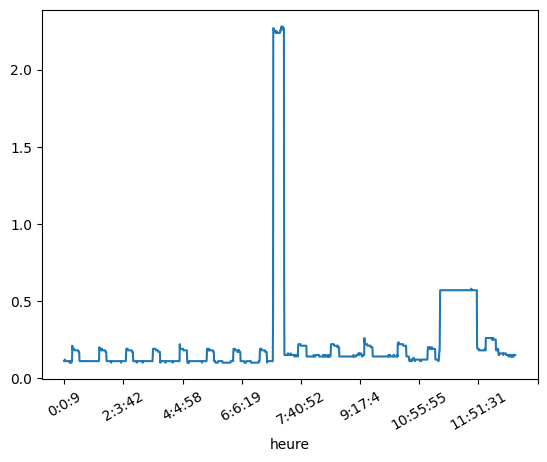

In [1503]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1504]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:22.374491,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:44.232491,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:22:06.233491,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:28.161491,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:50.052491,21/08/23
...,...,...,...,...,...,...,...
1387361,24491,0.15,24.491,146.992773,32635230611,2024-09-02 12:41:31.051491,02/09/24
1387362,24009,0.15,24.009,149.943771,32635254620,2024-09-02 12:41:55.060491,02/09/24
1387363,24303,0.15,24.303,148.129861,32635278923,2024-09-02 12:42:19.363491,02/09/24
1387364,24471,0.15,24.471,147.112909,32635303394,2024-09-02 12:42:43.834491,02/09/24


In [1505]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:9,33476,0.11,33.476,107.539730,32589548919,2024-09-02 00:00:09.359491,02/09/24
0:0:40,31455,0.11,31.455,114.449213,32589580374,2024-09-02 00:00:40.814491,02/09/24
0:1:11,30513,0.12,30.513,117.982499,32589610887,2024-09-02 00:01:11.327491,02/09/24
0:1:42,31248,0.12,31.248,115.207373,32589642135,2024-09-02 00:01:42.575491,02/09/24
0:2:14,32016,0.11,32.016,112.443778,32589674151,2024-09-02 00:02:14.591491,02/09/24
...,...,...,...,...,...,...,...
12:41:31,24491,0.15,24.491,146.992773,32635230611,2024-09-02 12:41:31.051491,02/09/24
12:41:55,24009,0.15,24.009,149.943771,32635254620,2024-09-02 12:41:55.060491,02/09/24
12:42:19,24303,0.15,24.303,148.129861,32635278923,2024-09-02 12:42:19.363491,02/09/24


In [1506]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 12/08/24 4.38
Min : 20/08/24 3.259


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1385460,33476,0.11,33.476,107.539730,32589548919,2024-09-02 00:00:09.359491,02/09/24,0:0:9
1385461,31455,0.11,31.455,114.449213,32589580374,2024-09-02 00:00:40.814491,02/09/24,0:0:40
1385462,30513,0.12,30.513,117.982499,32589610887,2024-09-02 00:01:11.327491,02/09/24,0:1:11
1385463,31248,0.12,31.248,115.207373,32589642135,2024-09-02 00:01:42.575491,02/09/24,0:1:42
1385464,32016,0.11,32.016,112.443778,32589674151,2024-09-02 00:02:14.591491,02/09/24,0:2:14
...,...,...,...,...,...,...,...,...
1387361,24491,0.15,24.491,146.992773,32635230611,2024-09-02 12:41:31.051491,02/09/24,12:41:31
1387362,24009,0.15,24.009,149.943771,32635254620,2024-09-02 12:41:55.060491,02/09/24,12:41:55
1387363,24303,0.15,24.303,148.129861,32635278923,2024-09-02 12:42:19.363491,02/09/24,12:42:19
1387364,24471,0.15,24.471,147.112909,32635303394,2024-09-02 12:42:43.834491,02/09/24,12:42:43


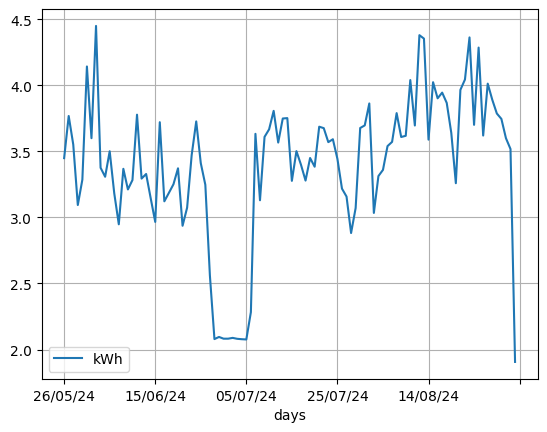

In [1507]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-09-02 00:00:09.359491	2024-09-02 07:40:35.869491	7h 40m 26s 	1000
2024-09-02 07:40:35.869491	2024-09-02 12:43:07.680491	5h 2m 31s 	906
<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 1385460 to 1387365
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1906 non-null   int64         
 1   kWh        1906 non-null   float64       
 2   sec        1906 non-null   float64       
 3   Wh         1906 non-null   float64       
 4   cumul(ms)  1906 non-null   int64         
 5   dates      1906 non-null   datetime64[ns]
 6   days       1906 non-null   object        
 7   heure      1906 non-null   object        
 8   hours      1906 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 148.9+ KB


('02/09/24', <Axes: xlabel='hours'>)

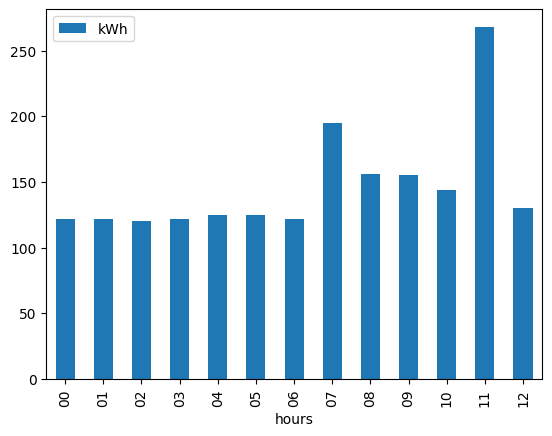

In [1508]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1509]:
df_grp

,kWh
days,
21/08/23,0.805
22/08/23,3.699
23/08/23,4.222
24/08/23,3.683
25/08/23,4.182
...,...
29/08/24,3.787
30/08/24,3.746
31/08/24,3.600


In [1510]:
# select number of days to display
span = 30
#df_grp.tail(span)


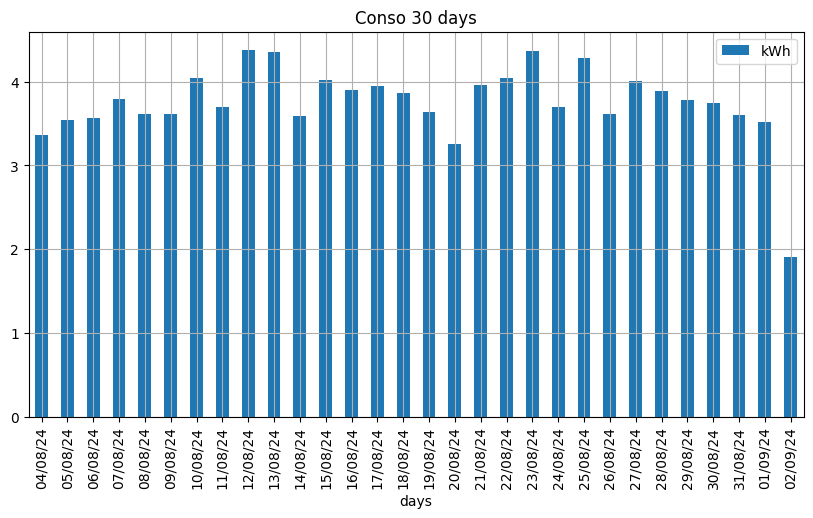

In [1511]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


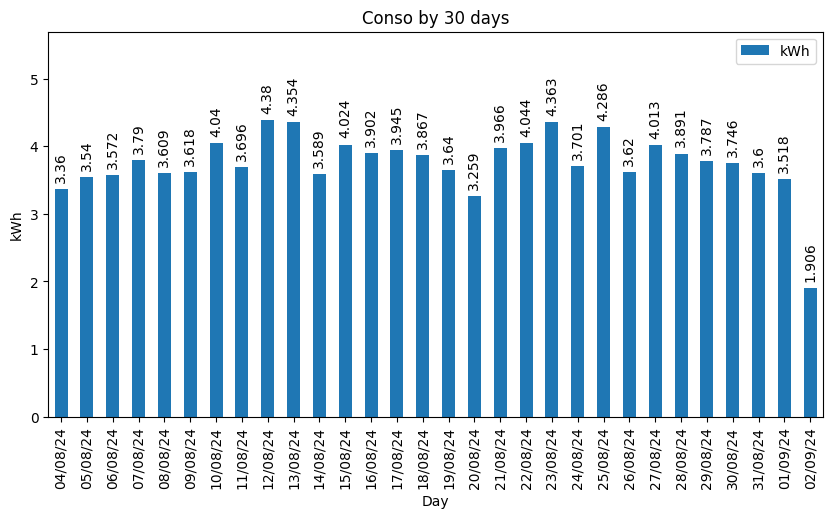

In [1512]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1513]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
04/08/24    3.360
05/08/24    3.540
06/08/24    3.572
07/08/24    3.790
08/08/24    3.609
09/08/24    3.618
10/08/24    4.040
11/08/24    3.696
12/08/24    4.380
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.945
18/08/24    3.867
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.044
23/08/24    4.363
24/08/24    3.701
25/08/24    4.286
26/08/24    3.620
27/08/24    4.013
28/08/24    3.891
29/08/24    3.787
30/08/24    3.746
31/08/24    3.600
01/09/24    3.518
02/09/24    1.906
Name: kWh, dtype: float64

In [1514]:
x_labels=df_grp.tail(span).index
x_labels

Index(['04/08/24', '05/08/24', '06/08/24', '07/08/24', '08/08/24', '09/08/24',
       '10/08/24', '11/08/24', '12/08/24', '13/08/24', '14/08/24', '15/08/24',
       '16/08/24', '17/08/24', '18/08/24', '19/08/24', '20/08/24', '21/08/24',
       '22/08/24', '23/08/24', '24/08/24', '25/08/24', '26/08/24', '27/08/24',
       '28/08/24', '29/08/24', '30/08/24', '31/08/24', '01/09/24', '02/09/24'],
      dtype='object', name='days')

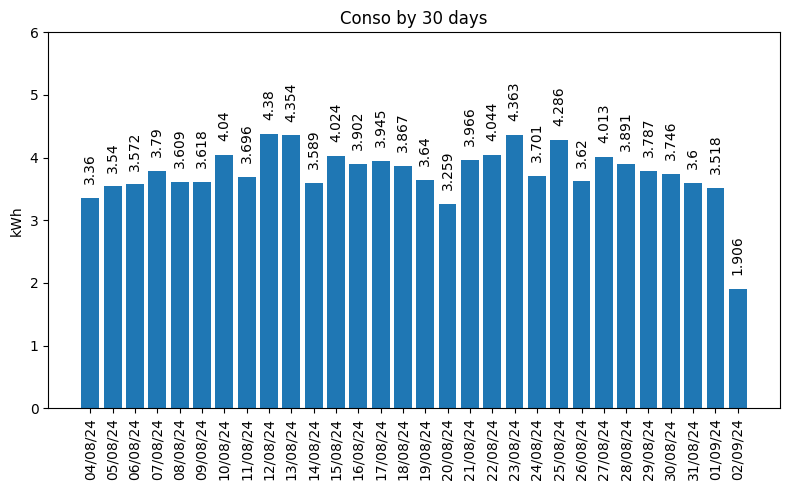

In [1515]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1516]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

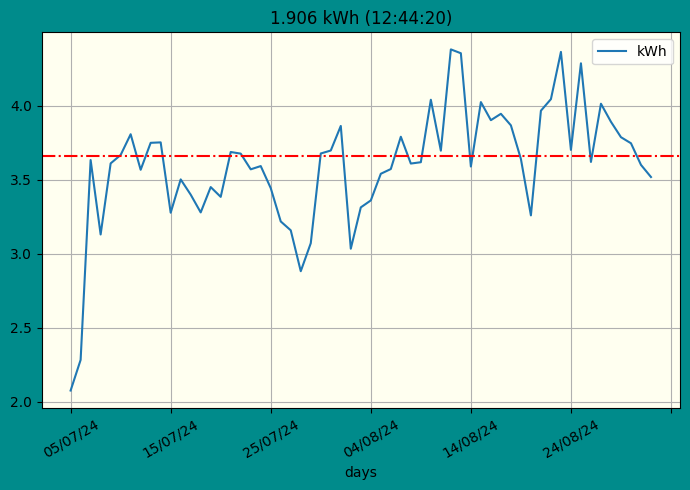

In [1517]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

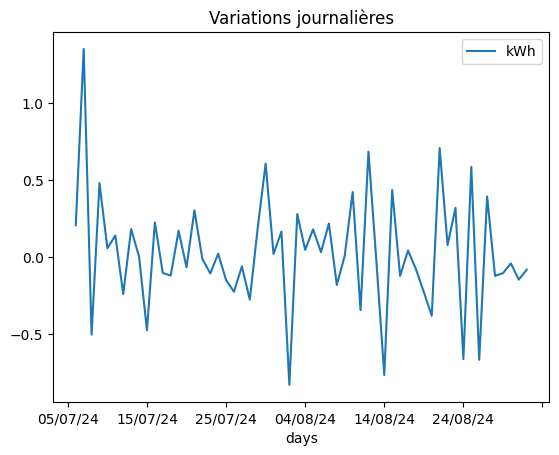

In [1518]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1519]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:21:22.374491,21/08/23,19
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:21:44.232491,21/08/23,19
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:22:06.233491,21/08/23,19
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:22:28.161491,21/08/23,19
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:22:50.052491,21/08/23,19
...,...,...,...,...,...,...,...,...
1387361,24491,0.15,24.491,146.992773,32635230611,2024-09-02 12:41:31.051491,02/09/24,12
1387362,24009,0.15,24.009,149.943771,32635254620,2024-09-02 12:41:55.060491,02/09/24,12
1387363,24303,0.15,24.303,148.129861,32635278923,2024-09-02 12:42:19.363491,02/09/24,12
1387364,24471,0.15,24.471,147.112909,32635303394,2024-09-02 12:42:43.834491,02/09/24,12


In [1520]:

# group all by day for all conso_days
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
groupallbyday.tail()


,days,hours,kWh
116,21/08/23,19,0.16
117,21/08/23,19,0.16
118,21/08/23,19,0.16
119,21/08/23,19,0.16
120,21/08/23,19,0.16
...,...,...,...
1387361,02/09/24,12,0.15
1387362,02/09/24,12,0.15
1387363,02/09/24,12,0.15
1387364,02/09/24,12,0.15


In [1521]:
grp_by_day = groupallbyday.count()
grp_by_day

kWh
days     hours     
21/08/23 19     121
         20     280
         21     144
         22     129
         23     131
...             ...
02/09/24 08     156
         09     155
         10     144
         11     268
         12     130

[9066 rows x 1 columns]

In [1522]:
grp_by_day['cumsum'] = grp_by_day.groupby(level=0)['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(level=0)['kWh'].diff()
# or
grp_by_day['cumsum'] = grp_by_day.groupby(['days'])['kWh'].cumsum()
grp_by_day['diff'] = grp_by_day.groupby(['days'])['kWh'].diff()
grp_by_day

kWh  cumsum   diff
days     hours                    
21/08/23 19     121     121    NaN
         20     280     401  159.0
         21     144     545 -136.0
         22     129     674  -15.0
         23     131     805    2.0
...             ...     ...    ...
02/09/24 08     156    1209  -39.0
         09     155    1364   -1.0
         10     144    1508  -11.0
         11     268    1776  124.0
         12     130    1906 -138.0

[9066 rows x 3 columns]

Text(0.5, 1.0, 'Cumul journalier')

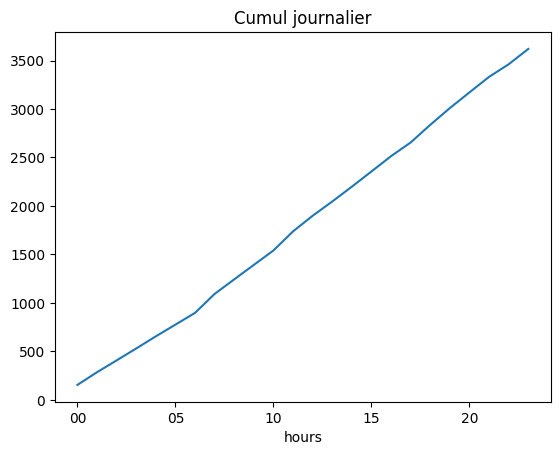

In [1523]:
# progression sans surprise
grp_by_day.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

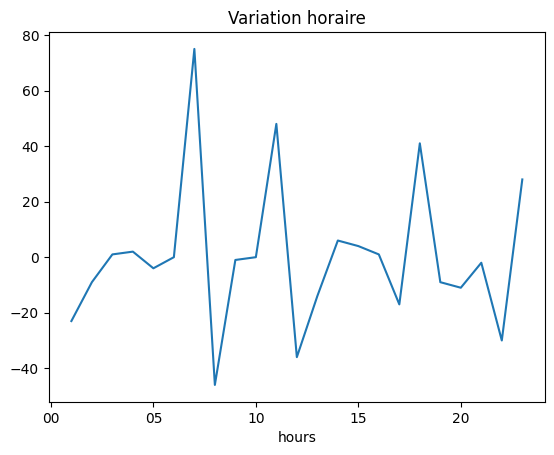

In [1524]:
# plus parlant
grp_by_day.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1525]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_day.index.levels[0].unique())
# or
n = len(grp_by_day.index.levels[0])
# or
n = grp_by_day.index.levshape[0]  # levshape -> (371,24)
n

379

Text(0.5, 1.0, '379 days')

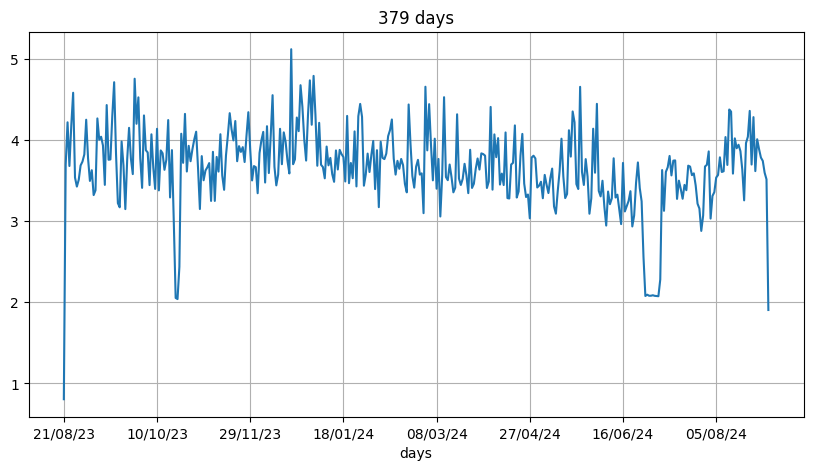

In [1526]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1527]:
grp_by_day.loc[day]

,kWh,cumsum,diff
hours,,,
00,122,122,NaN
01,122,244,0.0
02,120,364,-2.0
03,122,486,2.0
04,125,611,3.0
05,125,736,0.0
06,122,858,-3.0
07,195,1053,73.0
08,156,1209,-39.0


In [1528]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_day.loc[day])


13

In [1529]:
l = range(1,len(grp_by_day.loc[day])+1)
l

range(1, 14)

In [1530]:
grp_by_day.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1531]:
grp_by_day.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [1532]:
### ????????????????????????
grp_by_day.loc[day,'days'] = grp_by_day.loc[day,'days'].values.astype('int64')

In [1533]:
grp_by_day.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 00 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     13 non-null     int64  
 1   cumsum  13 non-null     int64  
 2   diff    12 non-null     float64
 3   days    13 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 520.0+ bytes


In [1534]:
grp_by_day.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,122,122,NaN,1.0
01,122,244,0.0,2.0
02,120,364,-2.0,3.0
03,122,486,2.0,4.0
04,125,611,3.0,5.0
05,125,736,0.0,6.0
06,122,858,-3.0,7.0
07,195,1053,73.0,8.0
08,156,1209,-39.0,9.0


Text(0.5, 1.0, '02/09/24')

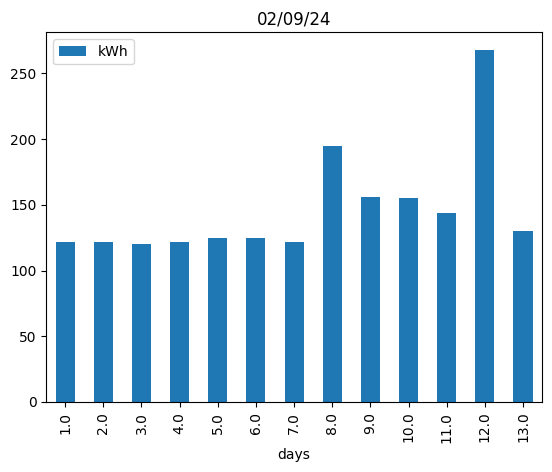

In [1535]:
grp_by_day.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1536]:
grp_by_day.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'],
      dtype='object', name='hours')

# Conso du jour


In [1537]:
groupedbyhour.count()

,kWh
hours,
00,122
01,122
02,120
03,122
04,125
05,125
06,122
07,195
08,156


In [1538]:
day = '26/08/24'
day = today
grp_by_day.loc[day].kWh

hours
00    122
01    122
02    120
03    122
04    125
05    125
06    122
07    195
08    156
09    155
10    144
11    268
12    130
Name: kWh, dtype: int64

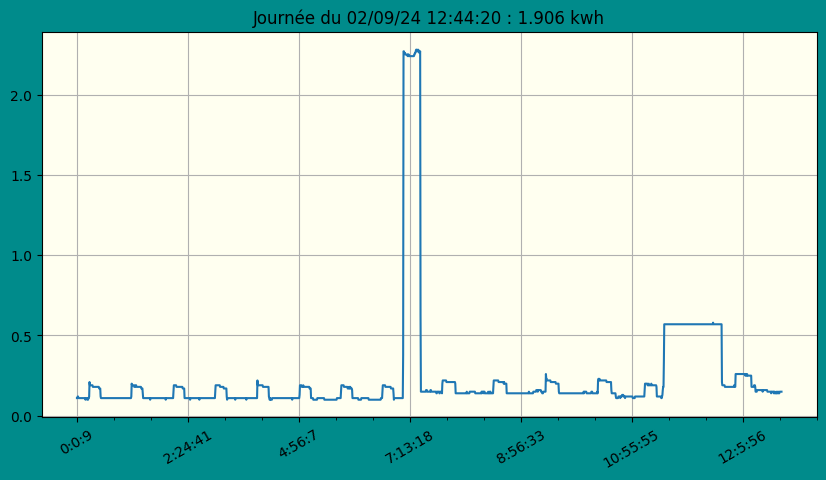

In [1539]:

show(day,bgcolor='ivory')


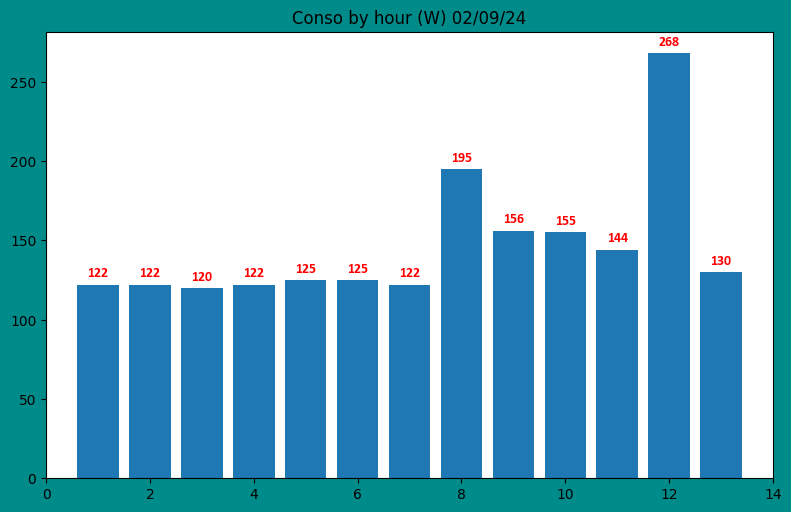

In [1540]:
# conso by hour
#data = groupedbyhour.count().kWh
data = grp_by_day.loc[day].kWh

# len(groupedbyhour)
x = np.arange(1,len(data)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
#plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {today}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


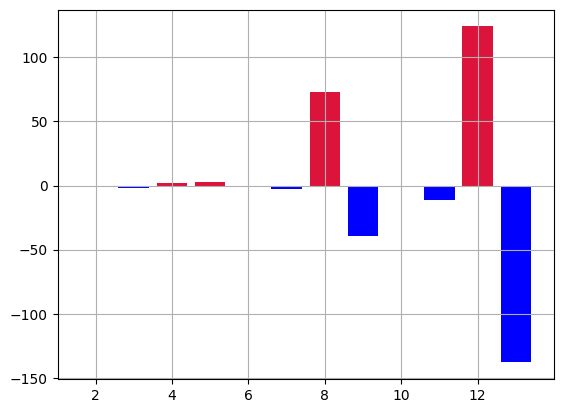

In [1541]:
diff = grp_by_day.loc[day]
diff
xx = np.arange(1,len(diff)+1)
plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

<Axes: xlabel='hours'>

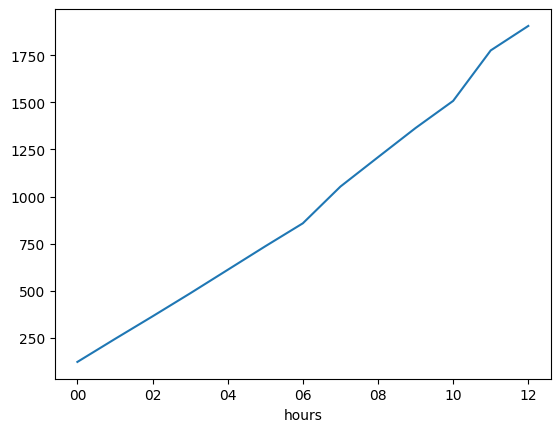

In [1542]:
data.cumsum().plot()


<Axes: xlabel='hours'>

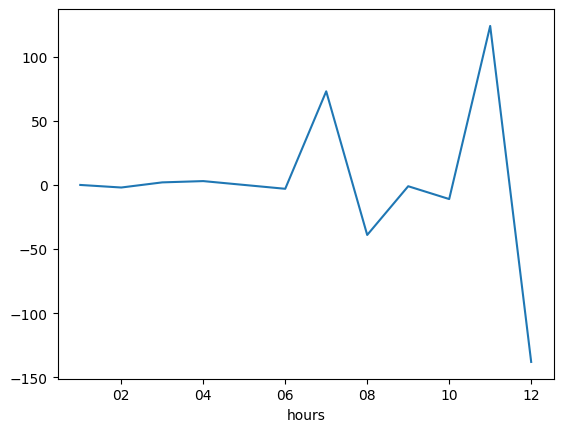

In [1543]:
data.diff().plot()

# Test

In [1544]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1545]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1546]:
#conso_byhour(day)

In [1547]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

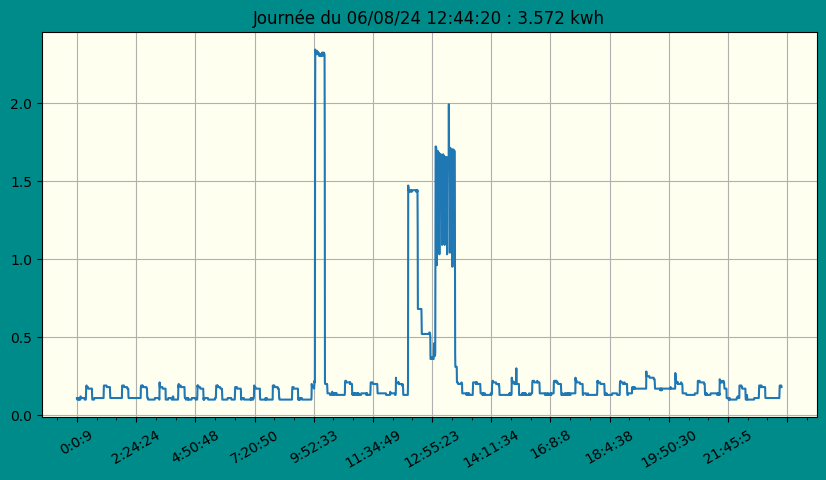

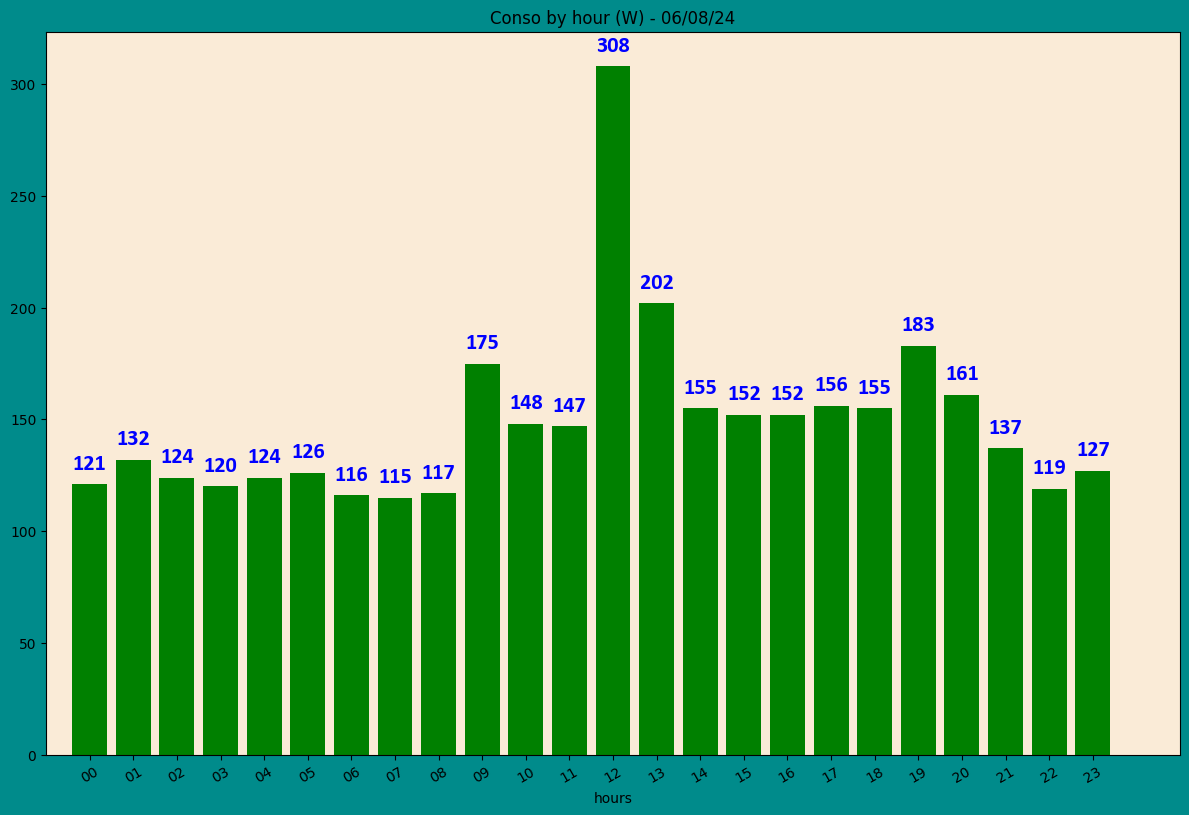

In [1548]:
# plot any day
day = '06/08/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

<Axes: xlabel='days'>

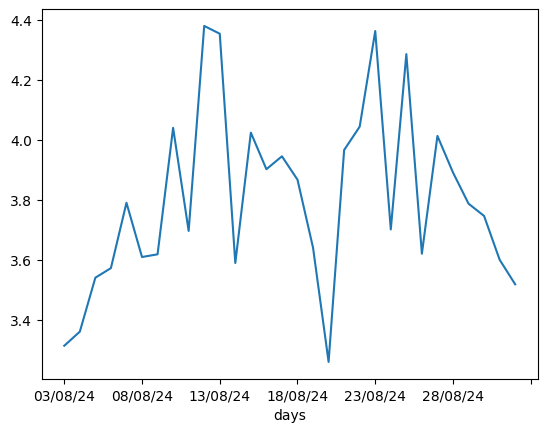

In [1549]:
month.plot()


In [1550]:
month

days
03/08/24    3.313
04/08/24    3.360
05/08/24    3.540
06/08/24    3.572
07/08/24    3.790
08/08/24    3.609
09/08/24    3.618
10/08/24    4.040
11/08/24    3.696
12/08/24    4.380
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.945
18/08/24    3.867
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.044
23/08/24    4.363
24/08/24    3.701
25/08/24    4.286
26/08/24    3.620
27/08/24    4.013
28/08/24    3.891
29/08/24    3.787
30/08/24    3.746
31/08/24    3.600
01/09/24    3.518
Name: kWh, dtype: float64

In [1551]:
month

days
03/08/24    3.313
04/08/24    3.360
05/08/24    3.540
06/08/24    3.572
07/08/24    3.790
08/08/24    3.609
09/08/24    3.618
10/08/24    4.040
11/08/24    3.696
12/08/24    4.380
13/08/24    4.354
14/08/24    3.589
15/08/24    4.024
16/08/24    3.902
17/08/24    3.945
18/08/24    3.867
19/08/24    3.640
20/08/24    3.259
21/08/24    3.966
22/08/24    4.044
23/08/24    4.363
24/08/24    3.701
25/08/24    4.286
26/08/24    3.620
27/08/24    4.013
28/08/24    3.891
29/08/24    3.787
30/08/24    3.746
31/08/24    3.600
01/09/24    3.518
Name: kWh, dtype: float64

In [1552]:
# date with max conso in 1 month
month.idxmax()

'12/08/24'

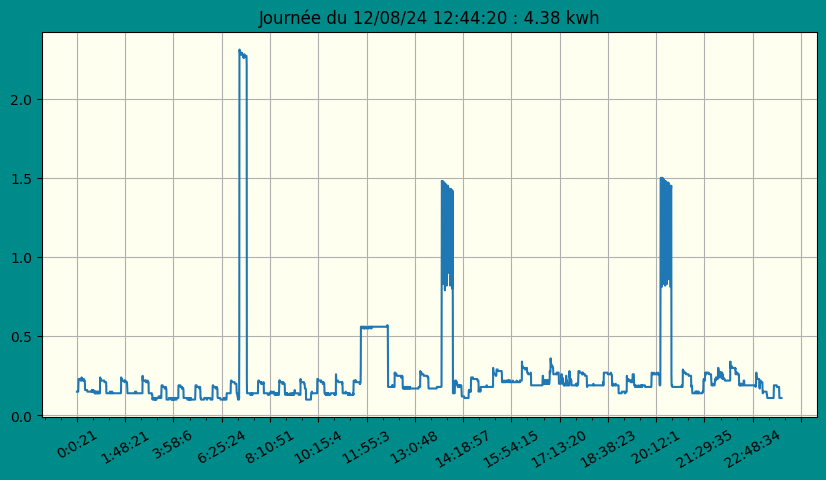

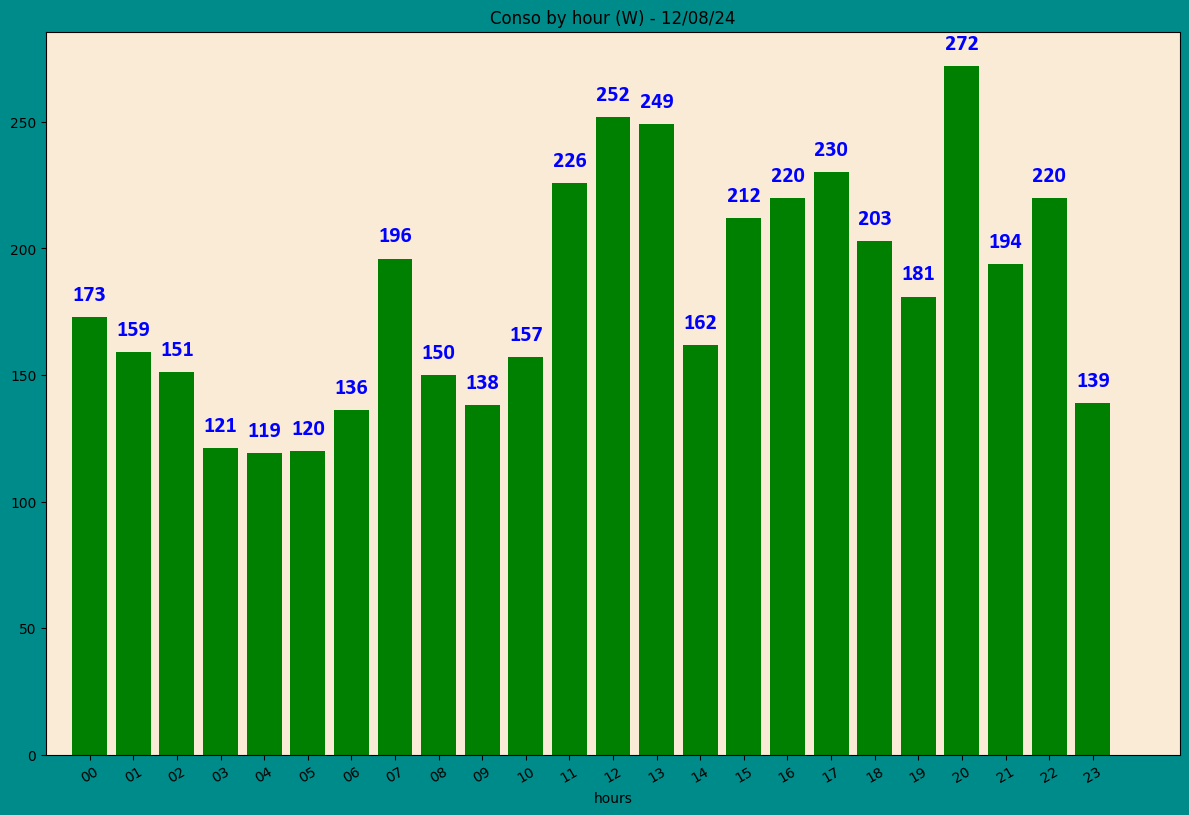

In [1553]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1554]:
grp_by_day.loc[month.idxmax()].tail(7)

,kWh,cumsum,diff,days
hours,,,,
17,230,3171,10.0,NaN
18,203,3374,-27.0,NaN
19,181,3555,-22.0,NaN
20,272,3827,91.0,NaN
21,194,4021,-78.0,NaN
22,220,4241,26.0,NaN
23,139,4380,-81.0,NaN


In [1555]:
grp_by_day.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

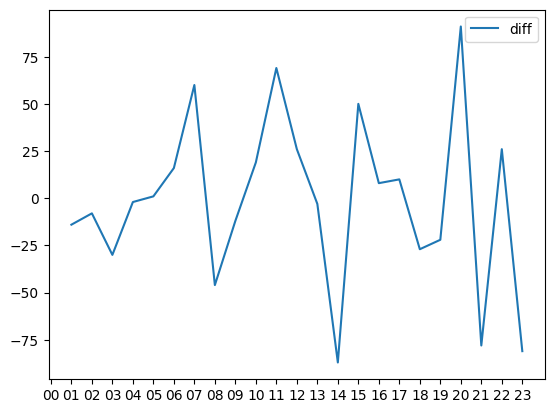

In [1556]:
plt.plot(grp_by_day.loc[month.idxmax()]['diff'],label=grp_by_day.columns[2])
plt.legend()

In [1557]:
# 41 s
# file to big to git sync

# create .gitignore
filename='conso_data.csv'
#conso_data.to_csv(filename)